In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 直方图计算函数
def GetHist(img):
    img = img.flatten()
    img = img.tolist()
    hist = []
    for i in range(0, 256):
        hist.append(img.count(i))
    return hist

# 6 二值图像处理

## 6.1 形态学处理

### 6.1.1 形态学膨胀

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 0 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


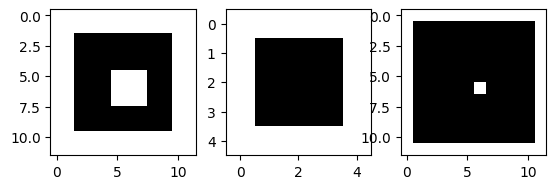

In [22]:
# 形态学膨胀
m = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

image = np.array(m, dtype=np.uint8)

kernel = np.array([[0, 0, 0, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 1, 1, 1, 0],
                   [0, 0, 0, 0, 0],],np.uint8) 

dilate = cv2.dilate(image, kernel, iterations=1)  
print(dilate)

plt.figure()
plt.subplot(131)
plt.imshow(image, cmap='binary')
plt.subplot(132)
plt.imshow(kernel, cmap='binary')
plt.subplot(133)
plt.imshow(dilate, cmap='binary')
plt.show()

kernel的中点落在坐标系上哪些点时，kernel与image的交集不为空

#### 形态学膨胀的应用

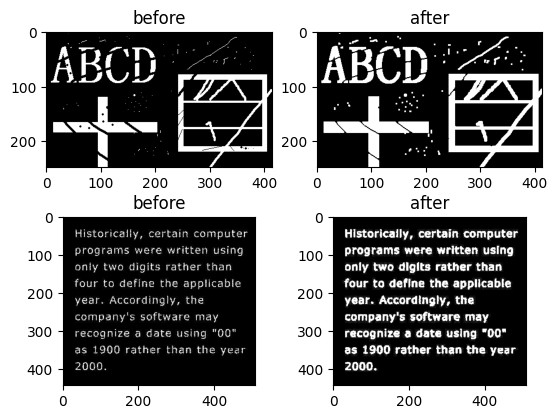

In [25]:
image1 = cv2.imread('./png_files/1.png', 0)
image2 = cv2.imread('./png_files/letter.png', 0)

kernel = np.ones((3,3), dtype=np.uint8)

dilate1 = cv2.dilate(image1, kernel, iterations=1)  
dilate2 = cv2.dilate(image2, kernel, iterations=1)  

plt.figure()
plt.subplot(221)
plt.title('before')
plt.imshow(image1, cmap='gray')
plt.subplot(222)
plt.title('after')
plt.imshow(dilate1, cmap='gray')
plt.subplot(223)
plt.title('before')
plt.imshow(image2, cmap='gray')
plt.subplot(224)
plt.title('after')
plt.imshow(dilate2, cmap='gray')
plt.show()

### 6.1.2 形态学腐蚀

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]


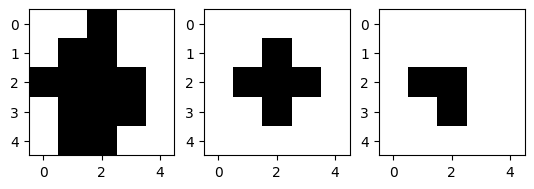

In [20]:
# 形态学腐蚀
m = [[0, 0, 1, 0, 0],
     [0, 1, 1, 0, 0],
     [1, 1, 1, 1, 0],
     [0, 1, 1, 1, 0],
     [0, 1, 1, 0, 0],]

image = np.array(m, dtype=np.uint8)

kernel = np.array([[0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0],],np.uint8) 

erosion = cv2.erode(image, kernel, iterations = 1)   #iteration的值越高，模糊程度(腐蚀程度)就越高 呈正相关关系且只能是整数

print(erosion)

plt.figure()
plt.subplot(131)
plt.imshow(image, cmap='binary')
plt.subplot(132)
plt.imshow(kernel, cmap='binary')
plt.subplot(133)
plt.imshow(erosion, cmap='binary')
plt.show()

kernel的中点落在坐标系中哪些点时，kernel可以完美地嵌入image中

#### 形态学腐蚀的应用

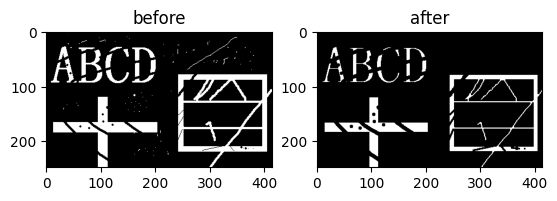

In [26]:
image = cv2.imread('./png_files/1.png', 0)

kernel = np.ones((3,3), dtype=np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)  

plt.figure()
plt.subplot(121)
plt.title('before')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.title('after')
plt.imshow(erosion, cmap='gray')
plt.show()

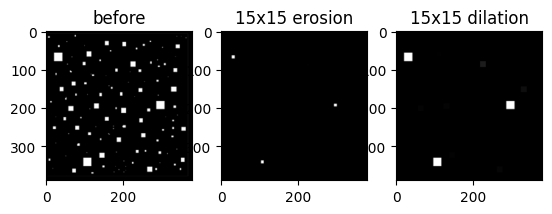

In [32]:
image = cv2.imread('./png_files/2.png', 0)

kernel = np.ones((15,15), dtype=np.uint8)

erosion = cv2.erode(image, kernel, iterations = 1)

dilate = cv2.dilate(erosion, kernel, iterations=1)

plt.figure()
plt.subplot(131)
plt.title('before')
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.title('15x15 erosion')
plt.imshow(erosion, cmap='gray')
plt.subplot(133)
plt.title('15x15 dilation')
plt.imshow(dilate, cmap='gray')
plt.show()

形态学腐蚀，有着滤波的效果

## 6.2 图像的开闭运算

### 6.2.1 开运算

先腐蚀再膨胀

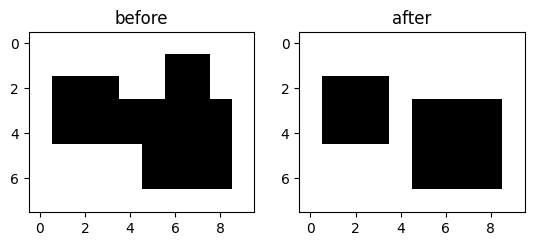

In [33]:
m = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
     [0, 1, 1, 1, 0, 0, 1, 1, 0, 0],
     [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
     [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
     [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
     [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],]

image = np.array(m, dtype=np.uint8)

kernel = np.ones((3,3), dtype=np.uint8)

img_open=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.subplot(121)
plt.title('before')
plt.imshow(image, cmap='binary')
plt.subplot(122)
plt.title('after')
plt.imshow(img_open, cmap='binary')
plt.show()

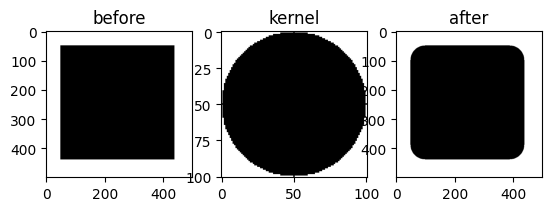

In [51]:
# 把kernel设置成圆形试试
m = np.zeros((499,499), dtype=np.uint8)

image = cv2.rectangle(m, pt1=(49,49), pt2=(438,438), color=1, thickness=-1)
image = np.array(m, dtype=np.uint8)

kernel = np.zeros((101,101), dtype=np.uint8)
kernel = cv2.circle(kernel, (50,50), 50, 1, -1)

img_open=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.subplot(131)
plt.title('before')
plt.imshow(image, cmap='binary')
plt.subplot(132)
plt.title('kernel')
plt.imshow(kernel, cmap='binary')
plt.subplot(133)
plt.title('after')
plt.imshow(img_open, cmap='binary')
plt.show()

* 用来消除小物体、在纤细处分离物体
* 平滑较大物体的边界同时并不明显改变其面积

### 6.2.2 闭运算

先膨胀再腐蚀

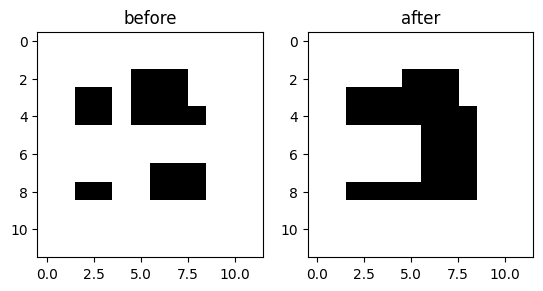

In [2]:
m = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
     [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0],
     [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
     [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],]

image = np.array(m, dtype=np.uint8)

kernel = np.ones((3,3), dtype=np.uint8)

img_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.subplot(121)
plt.title('before')
plt.imshow(image, cmap='binary')
plt.subplot(122)
plt.title('after')
plt.imshow(img_close, cmap='binary')
plt.show()

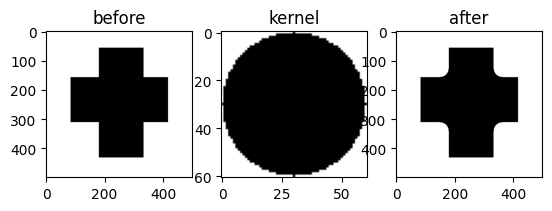

In [5]:
# 把kernel设置成圆形试试
image = cv2.imread('./png_files/3.png', 0)

kernel = np.zeros((61,61), dtype=np.uint8)
kernel = cv2.circle(kernel, (30,30), 30, 1, -1)

img_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.subplot(131)
plt.title('before')
plt.imshow(image, cmap='binary')
plt.subplot(132)
plt.title('kernel')
plt.imshow(kernel, cmap='binary')
plt.subplot(133)
plt.title('after')
plt.imshow(img_close, cmap='binary')
plt.show()

* 用来填充物体内细小空洞
* 连接邻近物体
* 平滑其边界的同时并不明显改变其面积

## 6.3 形态学应用实例

### 6.3.1 二值化指纹图像的预处理

1. **读入指纹图像**

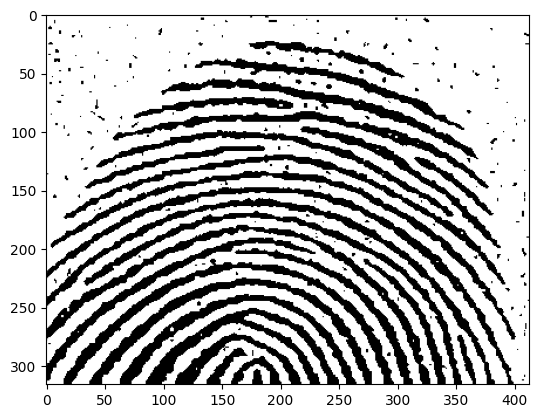

In [51]:
image = cv2.imread('./png_files/fingerprint.png', 0)

_, image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)    # image中像素值高于100的点，像素值全部拉到255

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

2. **使用3×3的小方块做一次腐蚀操作**

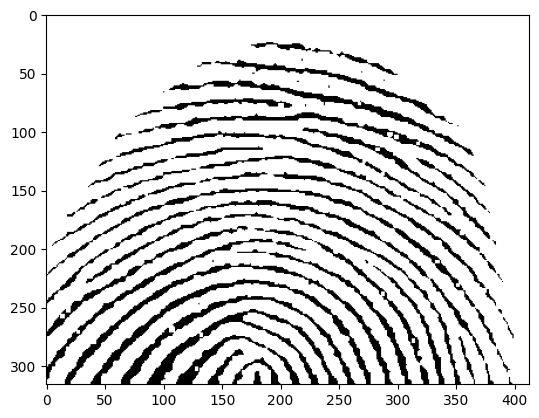

In [52]:
kernel = np.ones((3,3), dtype=np.uint8)
image = cv2.erode(image, kernel, iterations = 1)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

3. **使用3×3的小方块做一次膨胀操作（完成了一个完整的开运算操作）**

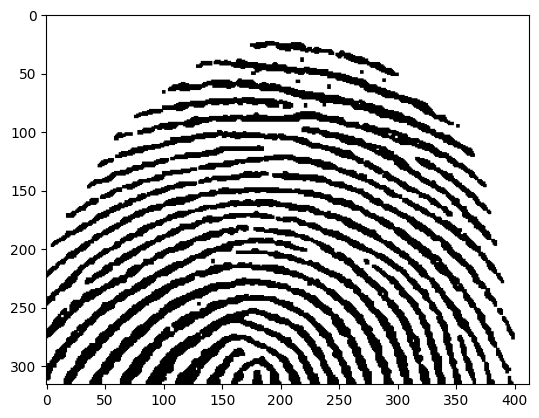

In [53]:
image = cv2.dilate(image, kernel, iterations = 1)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

4. **使用3×3的小方块做一次膨胀操作**

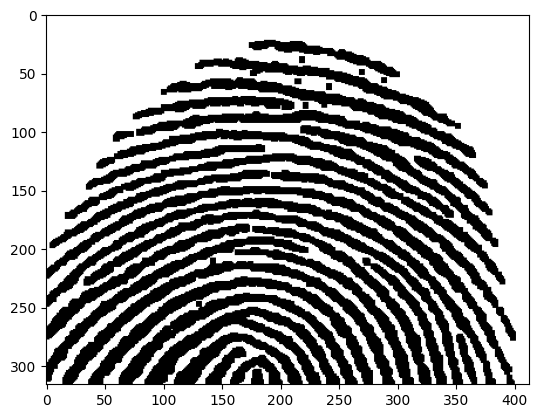

In [54]:
image = cv2.dilate(image, kernel, iterations = 1)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

5. **使用3×3的小方块做一次腐蚀操作（完成了一个完整的闭运算操作）**

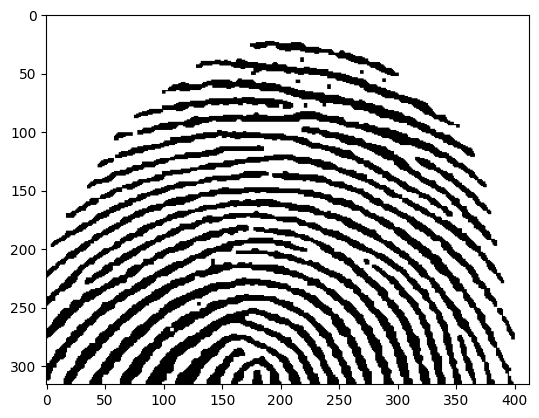

In [55]:
image = cv2.erode(image, kernel, iterations = 1)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

### 6.3.2 二值图像的边界提取

1. **读入图像**

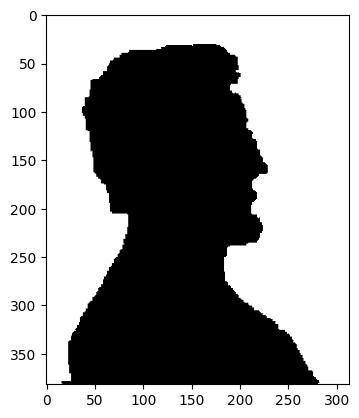

In [58]:
image = cv2.imread('./png_files/4.png', 0)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

2. **做一次膨胀运算**

3. **膨胀图像 - 原图**

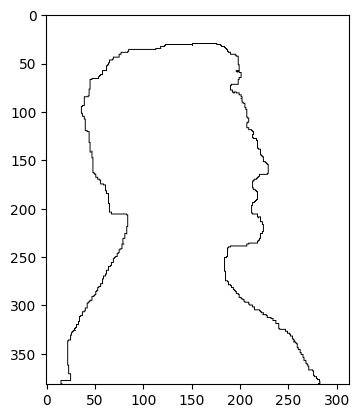

In [61]:
kernel = np.ones((3,3))

dilation = cv2.dilate(image, kernel, iterations=1)

plt.figure()
plt.imshow(dilation-image, cmap='binary')
plt.show()

### 6.3.3 识别物体形状

1. **定义一张黑白图像**

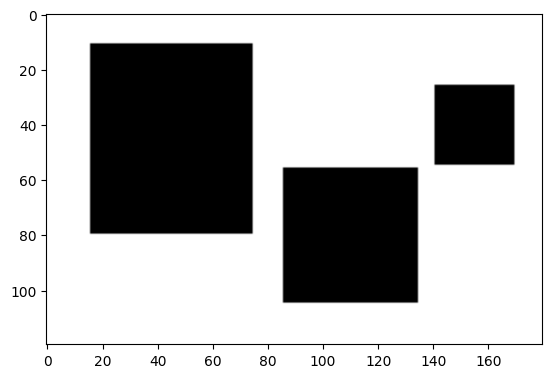

In [62]:
image = np.zeros((120,180), dtype = np.uint8)
image[11:80,16:75] = 1
image[56:105,86:135] =1;
image[26:55,141:170] = 1

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

2. **生成第一个结构图像**

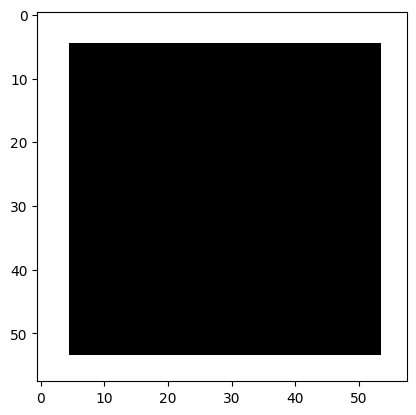

In [64]:
E = np.zeros((58,58), dtype=np.uint8)
E[5:54,5:54] = 1

plt.figure()
plt.imshow(E, cmap='binary')
plt.show()

3. **生成第二个结构图像**

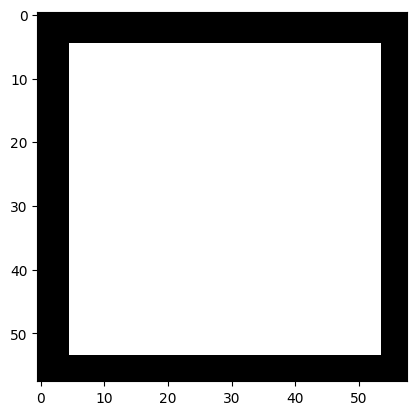

In [66]:
F = 1-E

plt.figure()
plt.imshow(F, cmap='binary')
plt.show()

4. **用第一个结构图像`E`去腐蚀原图**

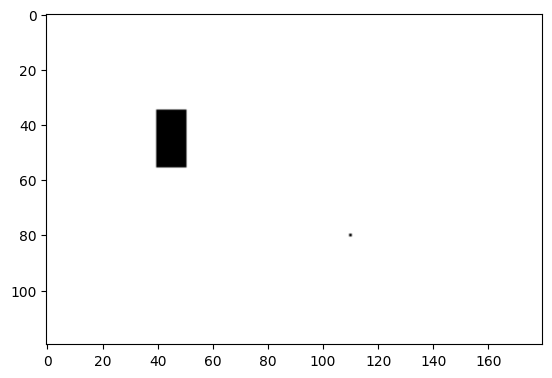

In [70]:
image_erosion = cv2.erode(image, E)

plt.figure()
plt.imshow(image_erosion, cmap='binary')
plt.show()

5. **用第二个结构图像`F`去腐蚀原图的补集**

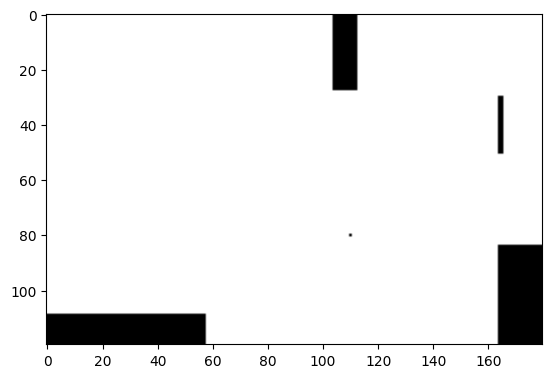

In [68]:
image_c = 1 - image

image_c_erosion = cv2.erode(image_c, F)

plt.figure()
plt.imshow(image_c_erosion, cmap='binary')
plt.show()

6. **将两次腐蚀的结果取交集，得到的空间上的一点代表：我们在这一点找到了一个尺寸符合的正方形**

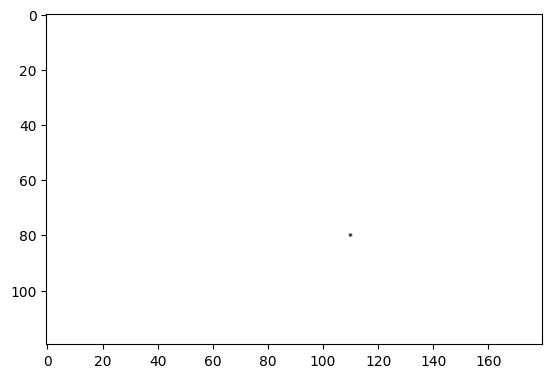

In [72]:
plt.figure()
plt.imshow(image_c_erosion & image_erosion, cmap='binary')
plt.show()

### 6.3.4 区域填充

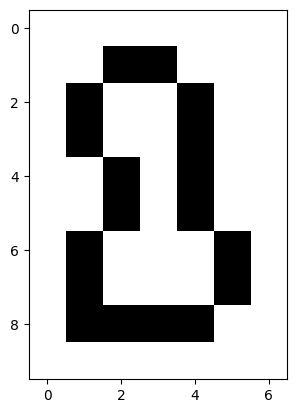

In [5]:
m = [[0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 1, 0, 0, 0],
     [0, 1, 0, 0, 1, 0, 0],
     [0, 1, 0, 0, 1, 0, 0],
     [0, 0, 1, 0, 1, 0, 0],
     [0, 0, 1, 0, 1, 0, 0],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 1, 0, 0, 0, 1, 0],
     [0, 1, 1, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0],]

image = np.array(m, dtype=np.uint8)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()

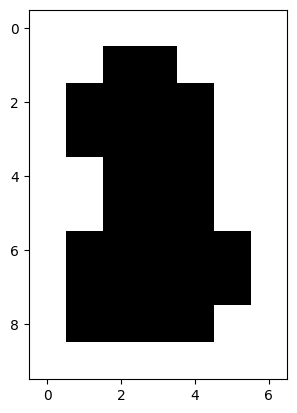

In [8]:
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.fillPoly(image,[contours[1]],1)

plt.figure()
plt.imshow(image, cmap='binary')
plt.show()